# Problem 3
### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
import astropy.constants as c
import mesa_web

In [2]:
# Define the path containing the MESA files
low_metal_dir = 'low-metal-low-mass/MESA-Web_Job_09262318630/'
high_metal_dir = 'high-metal-low-mass/MESA-Web_Job_09262318628/'

# Append the history file name to the path
low_metal_history_fname = low_metal_dir + 'trimmed_history.data'
high_metal_history_fname = high_metal_dir + 'trimmed_history.data'

# Read in the history files using mesa_web
low_metal_data_dict = mesa_web.read_history(low_metal_history_fname)
high_metal_data_dict = mesa_web.read_history(high_metal_history_fname)

In [3]:
# Extract parameters for the low metallicity star
low_metal_age = low_metal_data_dict['star_age']
low_metal_P_c = 10**low_metal_data_dict['log_center_P']
low_metal_He_frac = low_metal_data_dict['center_he4']
low_metal_He_mass = low_metal_data_dict['he_core_mass']

In [4]:
# Extract parameters for the high metallicity star
high_metal_age = high_metal_data_dict['star_age']
high_metal_P_c = 10**high_metal_data_dict['log_center_P']
high_metal_He_frac = high_metal_data_dict['center_he4']
high_metal_He_mass = high_metal_data_dict['he_core_mass']

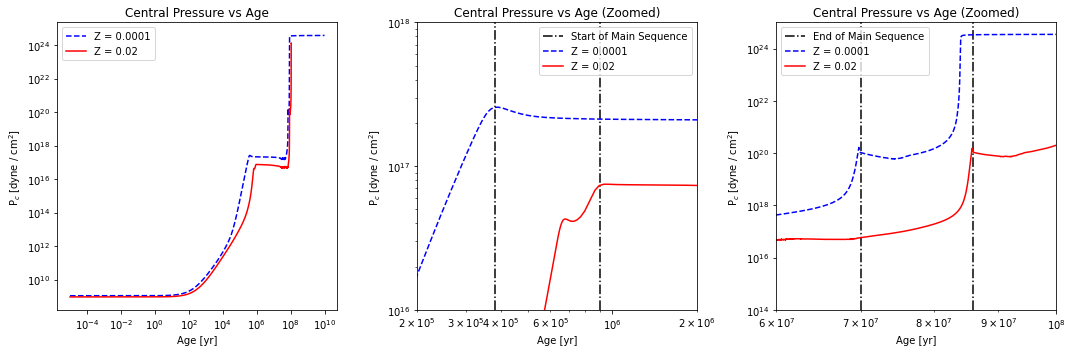

In [5]:
# Create a figure with 3 subplots, which all show the central pressure vs age for both stars
# Subplot 1 will show the entire range
# Subplot 2 will zoom in on the start of the main sequence phase
# Subplot 3 will zoom in on the end of the main sequence phase
# These diagrams will be used to determine the main sequence lifetime

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# left edge of the main sequence
ax[1].set_xlim(2e5, 2e6)
ax[1].set_ylim(1e16, 1e18)
ax[1].axvline(3.8e5, c='black', ls='dashdot', label='Start of Main Sequence')
ax[1].axvline(9e5, c='black', ls='dashdot')

# right edge of the main sequence
ax[2].set_xlim(6e7, 1e8)
ax[2].set_ylim(1e14, 1e25)
ax[2].axvline(7e7, c='black', ls='dashdot', label='End of Main Sequence')
ax[2].axvline(8.59e7, c='black', ls='dashdot')

# plot the same data in all 3 subplots, including labels and legends
for i in (0, 1, 2):
    ax[i].loglog(low_metal_age, low_metal_P_c, c='blue', ls='--', label='Z = 0.0001')
    ax[i].loglog(high_metal_age, high_metal_P_c, c='red', label='Z = 0.02')
    ax[i].set_title(r'Central Pressure vs Age' + ' (Zoomed)'*round(i/1.5)) # hack to make plot titles
    ax[i].set_xlabel(r'Age [yr]')
    ax[i].set_ylabel(r'P$_{c}$ [dyne / cm$^2$]')
    ax[i].legend()
    
plt.tight_layout()

In [6]:
# age limits determined graphically (vertical lines) through trial and error
low_Z_age = 7e7 - 3.8e5 
high_Z_age = 8.59e7 - 9e5
print(f'Low metallicity main sequence lifetime: {low_Z_age/1e6:.3} My')
print(f'High metallicity main sequence lifetime: {high_Z_age/1e6:.3} My')

Low metallicity main sequence lifetime: 69.6 My
High metallicity main sequence lifetime: 85.0 My


From the leftmost plot above, we can see that the star enters the main sequence (stable central pressure) when its lifetime is on the order of $10^5$ - $10^6$ years and ends around $10^8$ years. Zooming in near the edges, we can determine the exact start and end times of the main sequence for both the high and low metallicity stars. The final ages I determined are printed above. One possible explanation for the shorter main sequence lifetime of the low-metallicity star is that it burns brighter/hotter due to its lower opacity, which causes it to expend its fuel more quickly and thus leave the main sequence. **The high metallicity star has a longer main sequence lifetime.**

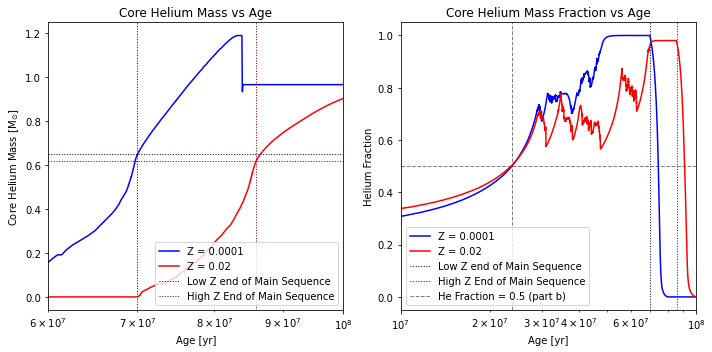

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plotting the core helium mass as a function of star age
ax[0].semilogx(low_metal_age, low_metal_He_mass, c='blue', ls='-', label='Z = 0.0001')
ax[0].semilogx(high_metal_age, high_metal_He_mass, c='red', label='Z = 0.02')
ax[0].axvline(7e7, c='navy', ls='dotted', lw=1, label='Low Z end of Main Sequence')
ax[0].axvline(8.59e7, c='darkred', ls='dotted',lw=1, label='High Z End of Main Sequence')
ax[0].axhline(0.65, c='navy', ls='dotted', lw=1)
ax[0].axhline(0.62, c='darkred', ls='dotted',lw=1)

ax[0].set_title(r'Core Helium Mass vs Age')
ax[0].set_xlim(6e7, 1e8)
ax[0].set_xlabel(r'Age [yr]')
ax[0].set_ylabel(r'Core Helium Mass [M$_{\odot}$]')
ax[0].legend()

# plotting the core helium mass fraction as a function of star age
ax[1].semilogx(low_metal_age, low_metal_He_frac, c='blue', ls='-', label='Z = 0.0001')
ax[1].semilogx(high_metal_age, high_metal_He_frac, c='red', label='Z = 0.02')
ax[1].axvline(7e7, c='navy', ls='dotted', lw=1, label='Low Z end of Main Sequence')
ax[1].axvline(8.59e7, c='darkred', ls='dotted',lw=1, label='High Z End of Main Sequence')
ax[1].axhline(0.5, c='grey', ls='--', zorder=-1, lw=1, label='He Fraction = 0.5 (part b)')
ax[1].axvline(2.38e7, c='grey', ls='--', zorder=-1, lw=1)

ax[1].set_title(r'Core Helium Mass Fraction vs Age')
ax[1].set_xlim(1e7, 1e8)
ax[1].set_xlabel(r'Age [yr]')
ax[1].set_ylabel(r'Helium Fraction')
ax[1].legend()

plt.tight_layout()

Using the main sequence end times from the previous part, we can measure the fraction of helium in the core of the star as a function of time. We see that the total helium fraction at the end of each star's main sequence phase is greater in the low-metallicity case, as is the total core helium mass. This might be explained by the higher temperature of the low metallicity star, which means that hydrogren burning can still happen even when the helium mass fraction becomes extremely high. In essence, the low-metallicity, high-temperature star can "squeeze" a little more fusion out of its core fuel supply, which results in more helium being generated. To directly answer the question, **the low metallicity star converts more H to He on the main sequence.**

## b)

In [8]:
# first we want to plot opacities during the main sequence phase, so I load in
# the files which are closest to the 'halfway' main sequence lifetime (see below)

# determine the profile file index to load in by trial and error
low_metal_index = 9
high_metal_index = 9

# make filename of profile datafile
low_metal_profile_fname = low_metal_dir + f'profile{low_metal_index}.data'
high_metal_profile_fname = high_metal_dir + f'profile{high_metal_index}.data'

# read in the profile files at this time step using mesa_web
low_metal_profile_dict = mesa_web.read_profile(low_metal_profile_fname)
high_metal_profile_dict = mesa_web.read_profile(high_metal_profile_fname)

# From part a, I found that the 'halfway point' (helium fraction of 1/2) is at ~24 My, so I pick
# the frames that have the closest age to this value.
age1 = low_metal_profile_dict['star_age']
age2 = high_metal_profile_dict['star_age']
print(f"star 1 age: {age1:.2e} years")
print(f"star 2 age: {age2:.2e} years")

star 1 age: 2.84e+07 years
star 2 age: 2.83e+07 years


In [9]:
# masses, opacities, and nuclear energy generation rate as a function of radius (mass)
m1 = low_metal_profile_dict['mass']
m2 = high_metal_profile_dict['mass']
k1 = low_metal_profile_dict['opacity']
k2 = high_metal_profile_dict['opacity']
eps1 = low_metal_profile_dict['eps_nuc']
eps2 = high_metal_profile_dict['eps_nuc']

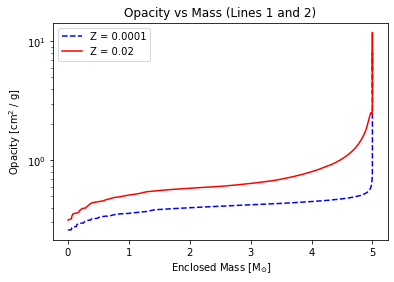

In [10]:
plt.semilogy(m1, k1, c='blue', ls='--', label='Z = 0.0001')
plt.semilogy(m2, k2, c='red', label='Z = 0.02')
plt.title(r'Opacity vs Mass (Lines 1 and 2)')
plt.xlabel(r' Enclosed Mass [M$_{\odot}$] ')
plt.ylabel(r'Opacity [cm$^2$ / g]')
plt.legend();

Lines 1 and 2 show that the stellar opacity is greater in the high metallicity star, which we clearly established in the last homework. This is caused by the many additional free electrons from the metals, in the form of electron scatter and, to a lesser extent at these temperatures, the formation of H$^-$ ions.

In [11]:
# looking at profiles where concurrent core and shell burning is happening, which
# is shortly after the main sequence for a 5 M_sun star

# determine the profile file index to load in by trial and error (see below)
low_metal_index_late = 85
high_metal_index_late = 120

# make filename of profile datafile
low_metal_late_profile_fname = low_metal_dir + f'profile{low_metal_index_late}.data'
high_metal_late_profile_fname = high_metal_dir + f'profile{high_metal_index_late}.data'

# read in the profile files at this time step using mesa_web
low_metal_late_profile_dict = mesa_web.read_profile(low_metal_late_profile_fname)
high_metal_late_profile_dict = mesa_web.read_profile(high_metal_late_profile_fname)

age1 = low_metal_late_profile_dict['star_age']
age2 = high_metal_late_profile_dict['star_age']
print(f"Star 1 (low metallicity) shell burning age: {age1/1e6:.3} My")
print(f"Star 2 (high metallicity) shell burning age: {age2/1e6:.3} My")

# Comparing these ages with the end of main sequence times estimated in part a (70 My and 86 My)
# we see that the shell burning occurs shortly thereafer, which is what we expect.

Star 1 (low metallicity) shell burning age: 73.1 My
Star 2 (high metallicity) shell burning age: 90.4 My


In [12]:
# masses, opacities, and nuclear energy generation rate as a function of radius (mass)
m1_late = low_metal_late_profile_dict['mass']
m2_late = high_metal_late_profile_dict['mass']
k1_late = low_metal_late_profile_dict['opacity']
k2_late = high_metal_late_profile_dict['opacity']
eps1_late = low_metal_late_profile_dict['eps_nuc']
eps2_late = high_metal_late_profile_dict['eps_nuc']

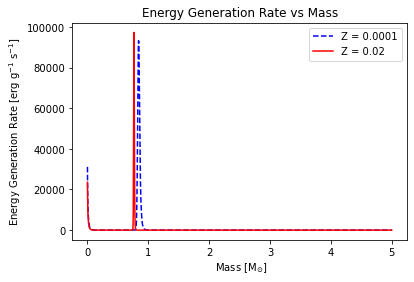

In [13]:
plt.plot(m1_late, eps1_late, c='blue', ls='--', label='Z = 0.0001')
plt.plot(m2_late, eps2_late, c='red', label='Z = 0.02')
plt.title(r'Energy Generation Rate vs Mass')
plt.xlabel(r' Mass [M$_{\odot}$] ')
plt.ylabel(r'Energy Generation Rate [erg g$^{-1}$ s$^{-1}$]')
plt.legend();

From this plot, we can see that there are two regions where the nuclear energy generation rate is non-zero. In the core, there is some residual burning going on. Beyond this, there is also some fusion ocurring in the outer shell. In the radius coordinate, we see that this occurs when $R < 0.2R_{\odot}$, which agrees with what is presented in the textbook for a $5 M_{\odot}$ star.

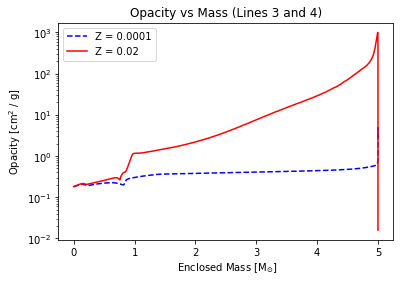

In [14]:
plt.semilogy(m1_late, k1_late, c='blue', ls='--', label='Z = 0.0001')
plt.semilogy(m2_late, k2_late, c='red', label='Z = 0.02')
plt.title(r'Opacity vs Mass (Lines 3 and 4)')
plt.xlabel(r' Enclosed Mass [M$_{\odot}$] ')
plt.ylabel(r'Opacity [cm$^2$ / g]')
plt.legend();

Lines 3 and 4 demonstrate that the opacity for the high-metallicity star gets drastically higher after shell burning starts. This makes sense from information in the textbook. After shell burning starts, the star quickly expands and its effective temperature drops. As a result, the H$^-$ ion is able to form in much larger concentrations towards the surface, which would cause a large increase in the opacity. However, the low-metallicity star, lacking many free electrons, can't form much H$^-$, which would explain why its opacity doesn't increase much once shell burning occurs.

## c)

In [15]:
# radii, pressures, and densities as a function of radius (mass)
r1 = low_metal_profile_dict['radius']
r2 = high_metal_profile_dict['radius']
p1 = low_metal_profile_dict['pressure']
p2 = high_metal_profile_dict['pressure']
rho1 = 10**low_metal_profile_dict['logRho']
rho2 = 10**high_metal_profile_dict['logRho']

# get the analytic pressure estimate using the approximation P = g/kappa
g1 = c.G * m1*u.Msun / (r1*u.Rsun)**2 # surface gravity
g2 = c.G * m2*u.Msun / (r2*u.Rsun)**2
p1_analytic = (g1 / (k1 * u.cm**2 / u.g)).to(u.dyne/u.cm**2)
p2_analytic = (g2 / (k2 * u.cm**2 / u.g)).to(u.dyne/u.cm**2)

In [16]:
def compute_tau(k, rho, r):
    '''
    Function that takes in a radial profile of opacity and density, as well as the
    radius coordinate, and computes the optical depth of a ray at each depth in
    the star with respect to the surface using dtau = k * rho * ds
    
    PARAMETERS
    ----------
    k: `numpy array`
        Opacity profile of the star in cgs units
    rho: `numpy array`
        Density profile of the star in cgs units
    r: `numpy array`
        Radius array, coordinate positions for k and rho in units of R_sun
    
    OUTPUTS
    -------
    tau: `numpy array`
        Optical depth at each radius with respect to the star's surface
    '''
    
    # initialize optical depth array
    tau = np.zeros_like(k)
    
    # convery the radius to cgs units
    r_cgs = r*u.Rsun.to(u.cm)

    for i in range(0, len(tau)):      
        tau[i] = np.trapz(k[i:] * rho[i:], x=r_cgs[i:])
        
    return tau

In [17]:
# compute the optical depth profiles for each star
tau1 = compute_tau(k1, rho1, r1)
tau2 = compute_tau(k2, rho2, r2)

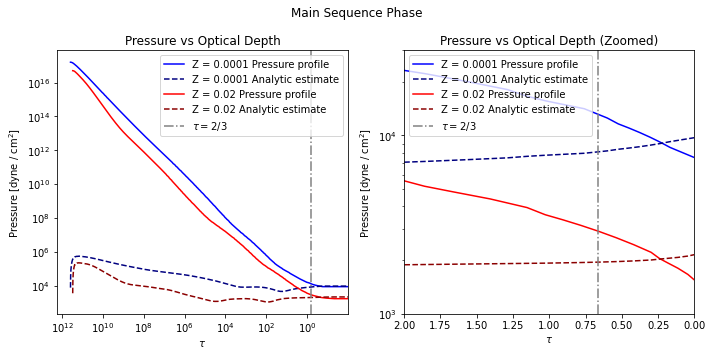

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in (0, 1):
    ax[i].loglog(tau1, p1, c='blue', label='Z = 0.0001 Pressure profile')
    ax[i].loglog(tau1, p1_analytic, c='navy', ls='--', label='Z = 0.0001 Analytic estimate')
    ax[i].loglog(tau2, p2, c='red',label='Z = 0.02 Pressure profile')
    ax[i].loglog(tau2, p2_analytic, c='darkred', ls='--', label='Z = 0.02 Analytic estimate')
    ax[i].axvline(2/3, c='grey', ls='dashdot', label=r'$\tau = 2/3$')
    
    ax[i].invert_xaxis()

    ax[i].set_title('Pressure vs Optical Depth' + ' (Zoomed)'*i)
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('Pressure [dyne / cm$^2$]')
    ax[i].legend()

ax[1].set_xscale('linear')
ax[1].set_xlim(2, 0)
ax[1].set_ylim(1e3, 3e4)

plt.suptitle('Main Sequence Phase')
plt.tight_layout()

As we can see from the analytic pressure estimate and the actual pressure at the photosphere surface start agreeing quite well at around $\tau = 2/3$ (from the left plot). This means our surface pressure estimate is pretty good during the main sequence phase.

In [19]:
# radii, pressures, and densities as a function of radius (mass)
r1_late = low_metal_late_profile_dict['radius']
r2_late = high_metal_late_profile_dict['radius']
p1_late = low_metal_late_profile_dict['pressure']
p2_late = high_metal_late_profile_dict['pressure']
rho1_late = 10**low_metal_late_profile_dict['logRho']
rho2_late = 10**high_metal_late_profile_dict['logRho']

# get the analytic pressure estimate
g1_late = c.G * m1_late*u.Msun / (r1_late*u.Rsun)**2
g2_late = c.G * m2_late*u.Msun / (r2_late*u.Rsun)**2
p1_analytic_late = (g1_late / (k1_late * u.cm**2 / u.g)).to(u.dyne/u.cm**2)
p2_analytic_late = (g2_late / (k2_late * u.cm**2 / u.g)).to(u.dyne/u.cm**2)

In [20]:
# compute the optical depth profiles for each star
tau1_late = compute_tau(k1_late, rho1_late, r1_late)
tau2_late = compute_tau(k2_late, rho2_late, r2_late)

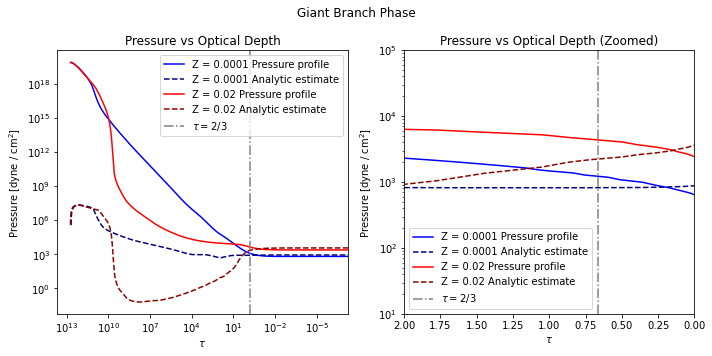

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in (0, 1):
    ax[i].loglog(tau1_late, p1_late, c='blue', label='Z = 0.0001 Pressure profile')
    ax[i].loglog(tau1_late, p1_analytic_late, c='navy', ls='--', label='Z = 0.0001 Analytic estimate')
    ax[i].loglog(tau2_late, p2_late, c='red',label='Z = 0.02 Pressure profile')
    ax[i].loglog(tau2_late, p2_analytic_late, c='darkred', ls='--', label='Z = 0.02 Analytic estimate')
    ax[i].axvline(2/3, c='grey', ls='dashdot', label=r'$\tau = 2/3$')
    
    ax[i].invert_xaxis()

    ax[i].set_title('Pressure vs Optical Depth' + ' (Zoomed)'*i)
    ax[i].set_xlabel(r'$\tau$')
    ax[i].set_ylabel('Pressure [dyne / cm$^2$]')
    ax[i].legend()

ax[1].set_xscale('linear')
ax[1].set_xlim(2, 0)
ax[1].set_ylim(10, 1e5)

plt.suptitle('Giant Branch Phase')
plt.tight_layout()

The surface pressure estimate still appears good during the giant phase, starting at $\tau = 2/3$. At the photosphere surface, it's off by a factor of a few at most. As observed from comparing the plots to the main sequence phase, the low-metallicity star has a much lower surface pressure in its giant phase as expected, which means that its spectral lines will be narrower due to a lack of pressure broadening. This lines up with what we expect - higher luminosity classes correspond with more evolved stars and narrower spectral line widths.

For some reason, though, the surface pressure of the high-metallicity star is even higher at $\tau = 2/3$ is even higher than in the main sequence phase. I'm struggling to grapple with why the pressure of the high-metallicity star has gone up. We know its opacity went up significantly due to a dropped effective temperature, which means we should be looking at higher up, cooler layers of the star at lower pressure. Nonetheless, although I cannot explain them, these results taken at face value suggest that the high-metallicity star should have broader spectral lines in the giant phase than in the main sequence since its surface pressure is greater.